In [17]:
!pip install unidecode


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [18]:
import pandas as pd
from unidecode import unidecode
import re
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/boris/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
df_train = pd.read_csv("./data/categories/train.csv")
df_test = pd.read_csv("./data/categories/test.csv")
df_complete = pd.concat([df_train,df_test])
index = df_complete['index']
titulo = df_complete['titulo']
categoria = df_train['categoria']

In [20]:
df_complete.head(10)

,index,titulo,categoria
0,610,"""De nada sirven los triunfos si la paz no los ...",Película y Animación
1,819,"""Hay mejores formas para uno mostrar su forma ...",Película y Animación
2,637,#LosNacionalesXSeñal - Bahía Cupica,Deportes
3,740,#LosNacionalesXSeñal - Estudiantes Utech balon...,Deportes
4,160,#LosNacionalesXSeñal - Las pruebas de triatlón...,Deportes
5,101,"#LosNacionalesXSeñal - María Elena Hurtado, la...",Deportes
6,405,#LosNacionalesXSeñal - Niños voley playa,Deportes
7,681,#LosNacionalesXSeñal - ¡Hicimos historia!,Deportes
8,428,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes
9,13,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes


In [21]:
titulo.head(20)

0     "De nada sirven los triunfos si la paz no los ...
1     "Hay mejores formas para uno mostrar su forma ...
2                   #LosNacionalesXSeñal - Bahía Cupica
3     #LosNacionalesXSeñal - Estudiantes Utech balon...
4     #LosNacionalesXSeñal - Las pruebas de triatlón...
5     #LosNacionalesXSeñal - María Elena Hurtado, la...
6              #LosNacionalesXSeñal - Niños voley playa
7             #LosNacionalesXSeñal - ¡Hicimos historia!
8     #PedaleoPor: Ariel Molina envía un saludo a lo...
9     #PedaleoPor: Ariel Molina envía un saludo a lo...
10    #PedaleoPor: Dagoberto López envía un saludo a...
11    #PedaleoPor: Esteban Kekessy envía un saludo a...
12    #PedaleoPor: Henry García envía un saludo a lo...
13    #PedaleoPor: James Guevara envía un saludo a l...
14    #PedaleoPor: Javier Cruz envía un saludo a los...
15    #PedaleoPor: Javier Rodríguez envía un saludo ...
16    #PedaleoPor: Jonathan Devía envía un saludo a ...
17    #PedaleoPor: Jorge Merchán envía un saludo

In [22]:
titulo = titulo.str.lower()

In [23]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxseñal - bahía cupica
3     #losnacionalesxseñal - estudiantes utech balon...
4     #losnacionalesxseñal - las pruebas de triatlón...
5     #losnacionalesxseñal - maría elena hurtado, la...
6              #losnacionalesxseñal - niños voley playa
7             #losnacionalesxseñal - ¡hicimos historia!
8     #pedaleopor: ariel molina envía un saludo a lo...
9     #pedaleopor: ariel molina envía un saludo a lo...
10    #pedaleopor: dagoberto lópez envía un saludo a...
11    #pedaleopor: esteban kekessy envía un saludo a...
12    #pedaleopor: henry garcía envía un saludo a lo...
13    #pedaleopor: james guevara envía un saludo a l...
14    #pedaleopor: javier cruz envía un saludo a los...
15    #pedaleopor: javier rodríguez envía un saludo ...
16    #pedaleopor: jonathan devía envía un saludo a ...
17    #pedaleopor: jorge merchán envía un saludo

In [24]:
titulo = titulo.apply(unidecode)

In [25]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxsenal - bahia cupica
3     #losnacionalesxsenal - estudiantes utech balon...
4     #losnacionalesxsenal - las pruebas de triatlon...
5     #losnacionalesxsenal - maria elena hurtado, la...
6              #losnacionalesxsenal - ninos voley playa
7             #losnacionalesxsenal - !hicimos historia!
8     #pedaleopor: ariel molina envia un saludo a lo...
9     #pedaleopor: ariel molina envia un saludo a lo...
10    #pedaleopor: dagoberto lopez envia un saludo a...
11    #pedaleopor: esteban kekessy envia un saludo a...
12    #pedaleopor: henry garcia envia un saludo a lo...
13    #pedaleopor: james guevara envia un saludo a l...
14    #pedaleopor: javier cruz envia un saludo a los...
15    #pedaleopor: javier rodriguez envia un saludo ...
16    #pedaleopor: jonathan devia envia un saludo a ...
17    #pedaleopor: jorge merchan envia un saludo

In [26]:
def quitar_caracteres_especiales(texto):
    return re.sub(r'[^A-Za-z0-9 ]+', '', texto)
titulo = titulo.apply(quitar_caracteres_especiales)

In [27]:
titulo.head(20)

0     de nada sirven los triunfos si la paz no los c...
1     hay mejores formas para uno mostrar su forma d...
2                     losnacionalesxsenal  bahia cupica
3      losnacionalesxsenal  estudiantes utech balonmano
4     losnacionalesxsenal  las pruebas de triatlon l...
5     losnacionalesxsenal  maria elena hurtado la pe...
6                losnacionalesxsenal  ninos voley playa
7                 losnacionalesxsenal  hicimos historia
8     pedaleopor ariel molina envia un saludo a los ...
9     pedaleopor ariel molina envia un saludo a los ...
10    pedaleopor dagoberto lopez envia un saludo a l...
11    pedaleopor esteban kekessy envia un saludo a l...
12    pedaleopor henry garcia envia un saludo a los ...
13    pedaleopor james guevara envia un saludo a los...
14    pedaleopor javier cruz envia un saludo a los e...
15    pedaleopor javier rodriguez envia un saludo a ...
16    pedaleopor jonathan devia envia un saludo a lo...
17    pedaleopor jorge merchan envia un saludo a

In [28]:
def obtener_palabras_unicas(texto, diccionario):
    palabras = re.findall(r'\b\w+\b', texto)
    for palabra in palabras:
        diccionario[palabra] = 0
        
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

,Palabra
0,de
1,nada
2,sirven
3,los
4,triunfos
5,si
6,la
7,paz
8,no
9,corona


In [29]:
len(df_palabras_unicas)

2109

In [30]:
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia

,de,nada,sirven,los,triunfos,si,la,paz,no,corona,...,ensenarle,papas,reciclar,paicol,cuentan,podemos,cambiar,ejemplar,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
de nada sirven los triunfos si la paz no los corona lapazhabla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hay mejores formas para uno mostrar su forma de pensar sofia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal bahia cupica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal estudiantes utech balonmano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal las pruebas de triatlon llenaron de emocion al municipio de prado,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
como ensenarle a los papas a reciclar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
como es tu municipio los ninos de paicol nos cuentan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
los ninos podemos cambiar el mundo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_matriz_frecuencia.columns

Index(['de', 'nada', 'sirven', 'los', 'triunfos', 'si', 'la', 'paz', 'no',
       'corona',
       ...
       'ensenarle', 'papas', 'reciclar', 'paicol', 'cuentan', 'podemos',
       'cambiar', 'ejemplar', 'dan', 'opinion'],
      dtype='object', length=2109)

In [32]:
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        df_matriz_frecuencia.at[fila.name,palabra] = titulo_interno.split().count(palabra)

In [33]:
df_matriz_frecuencia

,de,nada,sirven,los,triunfos,si,la,paz,no,corona,...,ensenarle,papas,reciclar,paicol,cuentan,podemos,cambiar,ejemplar,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
de nada sirven los triunfos si la paz no los corona lapazhabla,1,1,1,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
hay mejores formas para uno mostrar su forma de pensar sofia,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal bahia cupica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal estudiantes utech balonmano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal las pruebas de triatlon llenaron de emocion al municipio de prado,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
como ensenarle a los papas a reciclar,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
como es tu municipio los ninos de paicol nos cuentan,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
los ninos podemos cambiar el mundo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [34]:
#Stemmer
stop_words = set(stopwords.words('spanish'))
def simple_stemmer(text):
    stemmer = SnowballStemmer("spanish")
    tokenizers = ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    tokens = [stemmer.stem(token.strip()) for token in tokens if token not in stop_words]
    text = " ".join(tokens)
    return text

titulo = titulo.apply(simple_stemmer)

In [35]:
titulo.head(10)

0                   sirv triunf si paz coron lapazhabl
1                      mejor form mostr form pens sofi
2                       losnacionalesxsenal bahi cupic
3            losnacionalesxsenal estudi utech balonman
4    losnacionalesxsenal prueb triatlon llen emocio...
5     losnacionalesxsenal mari elen hurt pel antioquen
6                   losnacionalesxsenal nin voley play
7                      losnacionalesxsenal hic histori
8          pedaleopor ariel molin envi salud escarabaj
9          pedaleopor ariel molin envi salud escarabaj
Name: titulo, dtype: object

In [36]:
df_corr_dummies = pd.get_dummies(df_complete['categoria'], columns=['categoria'], drop_first=True)
df_corr_dummies.corr()

,Educación,Entretenimiento,Gente y Blogs,Otros,Película y Animación
Educación,1.000000,-0.191214,-0.085276,-0.080146,-0.163248
Entretenimiento,-0.191214,1.000000,-0.127995,-0.120294,-0.245026
Gente y Blogs,-0.085276,-0.127995,1.000000,-0.053648,-0.109275
Otros,-0.080146,-0.120294,-0.053648,1.000000,-0.102700
Película y Animación,-0.163248,-0.245026,-0.109275,-0.102700,1.000000


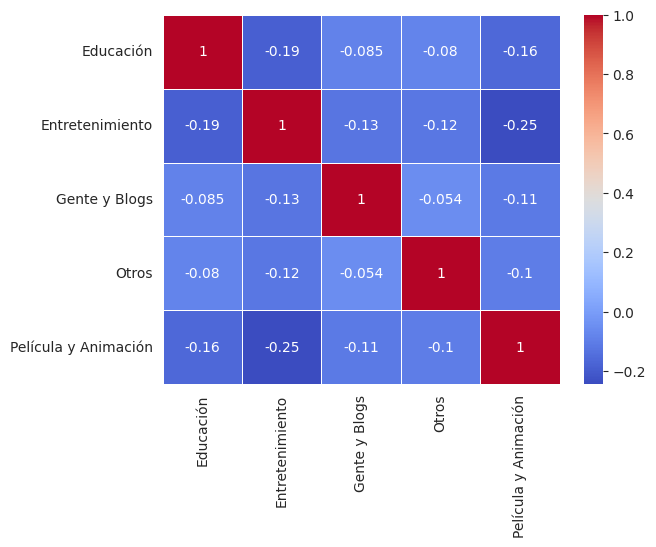

In [37]:
plt.Figure(figsize=(8,6))
sns.heatmap(df_corr_dummies.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Term Frequency (Matriz TF)

In [38]:
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

,Palabra
0,sirv
1,triunf
2,si
3,paz
4,coron
5,lapazhabl
6,mejor
7,form
8,mostr
9,pens


In [39]:
len(df_palabras_unicas)

1857

In [40]:
df_matriz_TF = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_TF

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,...,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mejor form mostr form pens sofi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal bahi cupic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal estudi utech balonman,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensen pap recicl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
municipi nin paicol cuent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nin pod cambi mund,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Definir la nueva matriz de frecuencia con las nuevas palabras y hacer el conteo de cada palabra en cada titulo
df_matriz_frecuencia = df_matriz_frecuencia.astype(float)
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        titulo_interno_vector = titulo_interno.split()
        df_matriz_frecuencia.at[titulo_interno,palabra] = titulo_interno_vector.count(palabra)
df_matriz_frecuencia

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,...,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mejor form mostr form pens sofi,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
losnacionalesxsenal bahi cupic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
losnacionalesxsenal estudi utech balonman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensen pap recicl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
municipi nin paicol cuent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
nin pod cambi mund,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [42]:
df_matriz_TF = df_matriz_TF.astype(float)
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    titulo_interno_vector = titulo_interno.split()
    for palabra in df_matriz_TF.columns:
        df_matriz_TF.at[titulo_interno,palabra] = (titulo_interno_vector.count(palabra))/len(titulo_interno_vector)
df_matriz_TF

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,...,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0
mejor form mostr form pens sofi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.166667,0.166667,...,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0
losnacionalesxsenal bahi cupic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0
losnacionalesxsenal estudi utech balonman,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensen pap recicl,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.333333,0.333333,0.00,0.00,0.00,0.000000,0.0,0.0
municipi nin paicol cuent,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.25,0.00,0.00,0.000000,0.0,0.0
nin pod cambi mund,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.00,0.25,0.25,0.000000,0.0,0.0


# Inverse Document Frequency (Vector IDF)

In [43]:
cantidad_documentos = len(df_matriz_frecuencia)
df_matriz_IDF = pd.DataFrame(columns=['Transformacion'], index=palabras_unicas)
for indice, fila in df_matriz_IDF.iterrows():
    palabra_interna = fila.name
    cantidad_total_palabra = df_matriz_frecuencia[f'{palabra_interna}'].sum()
    df_matriz_IDF.loc[palabra_interna] = np.log10(cantidad_documentos/(cantidad_total_palabra+1))
df_matriz_IDF

,Transformacion
sirv,2.69897
triunf,2.30103
si,2.221849
paz,2.30103
coron,2.69897
...,...
pod,2.69897
cambi,2.69897
ejempl,2.69897
dan,2.69897


In [44]:
df_matriz_IDF = df_matriz_IDF.transpose()

In [45]:
df_matriz_tf_idf = df_matriz_TF.copy()

In [46]:
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    for palabra in df_matriz_TF.columns:
        df_matriz_tf_idf.at[titulo_interno,palabra] = df_matriz_tf_idf.at[titulo_interno,palabra]*df_matriz_IDF.at['Transformacion',palabra]

In [47]:
df_matriz_tf_idf

,sirv,triunf,si,paz,coron,lapazhabl,mejor,form,mostr,pens,...,recuerd,90,ensen,recicl,paicol,pod,cambi,ejempl,dan,opinion
titulo,,,,,,,,,,,,,,,,,,,,,
sirv triunf si paz coron lapazhabl,0.449828,0.383505,0.370308,0.383505,0.449828,0.42048,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mejor form mostr form pens sofi,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.299313,0.799313,0.449828,0.449828,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
losnacionalesxsenal bahi cupic,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
losnacionalesxsenal estudi utech balonman,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
losnacionalesxsenal prueb triatlon llen emocion municipi prad,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ensen pap recicl,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.899657,0.899657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
municipi nin paicol cuent,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.674743,0.000000,0.000000,0.000000,0.000000,0.000000
nin pod cambi mund,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.674743,0.674743,0.000000,0.000000,0.000000


# Entrenamientos:
### Regresion logistica

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [49]:
count_vect = CountVectorizer(min_df=1, max_df=100000, binary=False, ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(df_train)
count_vect_test = count_vect.transform(df_test)

In [50]:
logistic_model = LogisticRegression(penalty="l2", max_iter=800, C=1.0, random_state=42)

In [51]:
logistic_model.fit(df_matriz_tf_idf.head(800), categoria)

In [52]:
logistic_prediction = logistic_model.predict(df_matriz_tf_idf.head(800))

Evaluemos las metricas sobre los mismos datos que estamos entrenando

In [53]:
print(f'Exactitud: {accuracy_score(categoria,logistic_prediction)}')

Exactitud: 0.86625


In [56]:
df_train['categoria'].unique()

array(['Película y Animación', 'Deportes', 'Gente y Blogs',
       'Entretenimiento', 'Otros', 'Educación'], dtype=object)

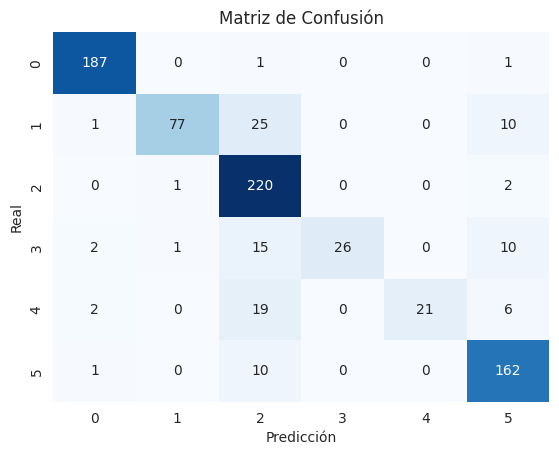

In [59]:
matriz_confusion_regresion = confusion_matrix(categoria, logistic_prediction)
sns.heatmap(matriz_confusion_regresion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Regresion Logistica')
plt.show()

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(df_matriz_tf_idf.head(800), categoria)
random_forest_prediction = random_forest_model.predict(df_matriz_tf_idf.head(800))

In [70]:
print(f'Exactitud: {accuracy_score(categoria,random_forest_prediction)}')

Exactitud: 1.0


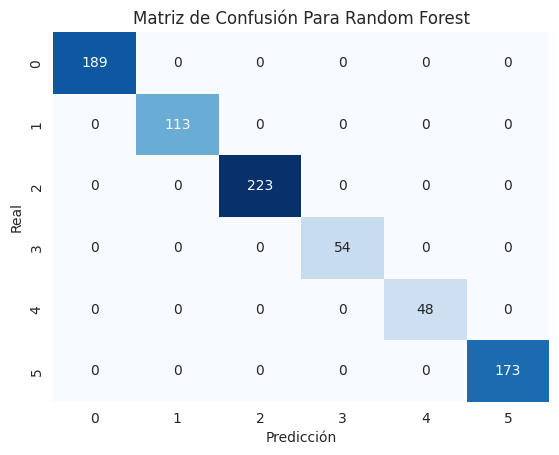

In [71]:
matriz_confusion_rf = confusion_matrix(categoria, random_forest_prediction)
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Random Forest')
plt.show()

### LSTM